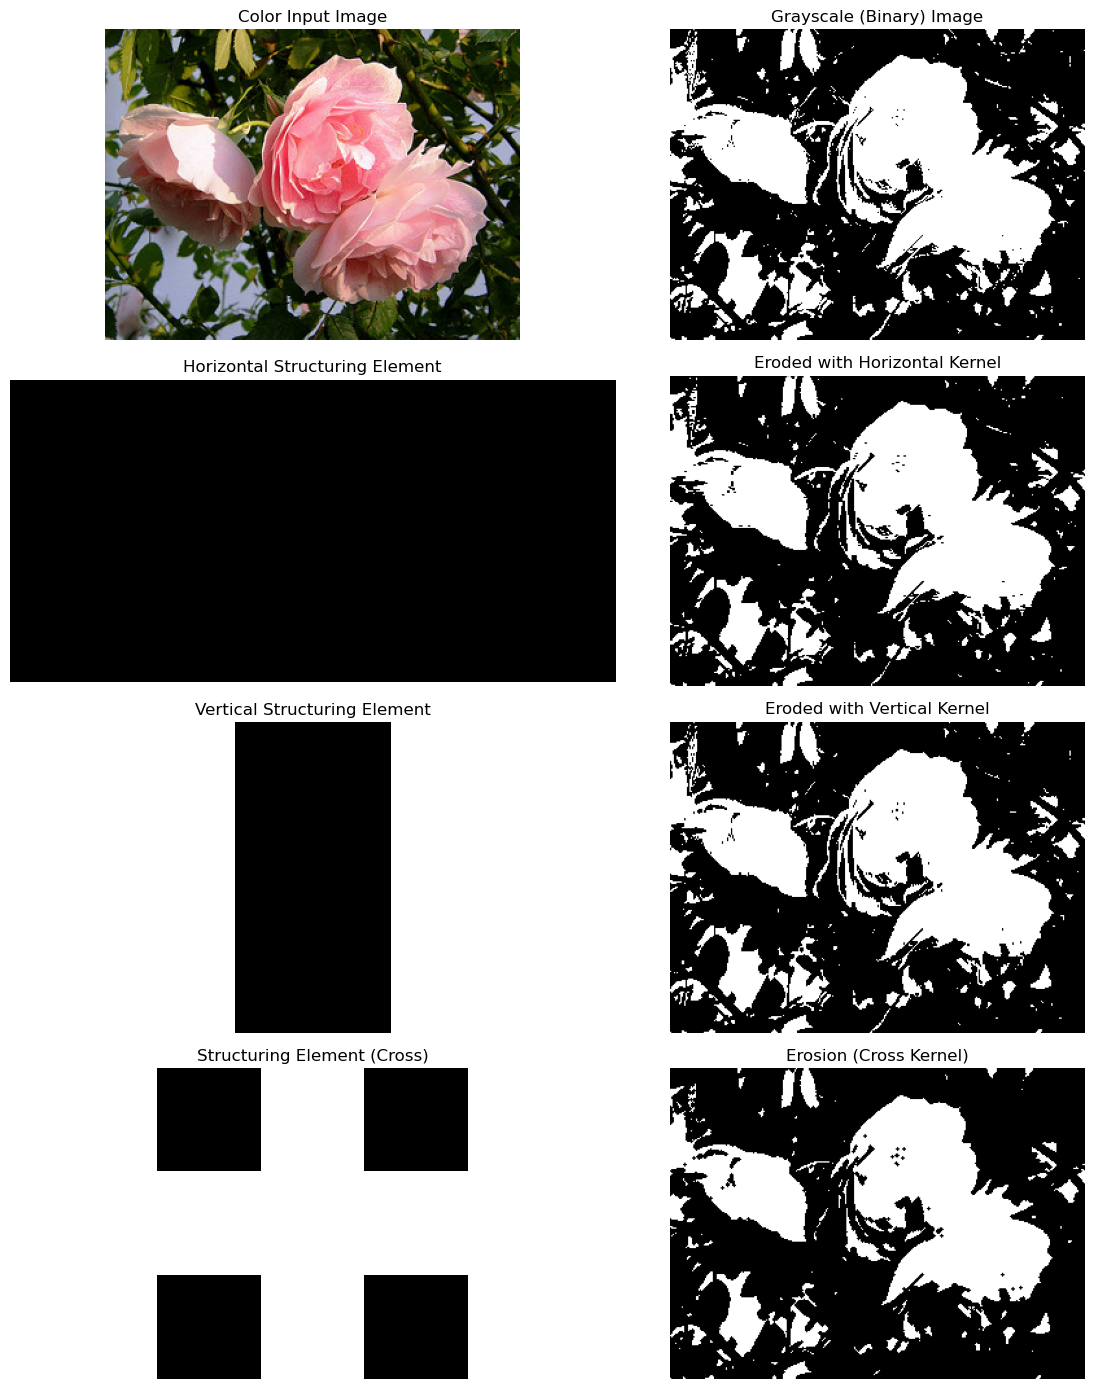

In [7]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# **Step 1: Load the Original Image and Convert to Grayscale**
# First, we load a color image from a file path and convert it to grayscale.
# The grayscale image simplifies the processing by reducing the image to a single channel (intensity values).
# For example, we use 'roses.jpg' as an image file in this case.
# We use OpenCV's `cv2.imread` to read the image and `cv2.cvtColor` to convert it to grayscale.

# Define the path to the image file (e.g., roses.jpg in this case)
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'color_original.jpg')
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Replace with your image path
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg') 


# Check if the image exists at the provided path
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert the image to grayscale (a single channel) for simplicity
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# **Step 2: Threshold the Grayscale Image to Create a Binary Image**
# The binary image will represent the foreground (objects) in white (255) and background in black (0).
# Thresholding converts the grayscale image to a binary form, making the object detection process simpler.
# We use OpenCV's `cv2.threshold` function to apply a threshold to the grayscale image.
# Pixels with intensity greater than 127 are set to 255 (white), and those less than or equal to 127 are set to 0 (black).

_, T_binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)


# **Step 3: Define Structuring Elements (SE) for the Morphological Operations**
# These elements define the shape of the neighborhood used in the morphological operation.
# Structuring elements are small matrices (usually odd-sized) used to define the "neighborhood" of each pixel 
# when performing morphological transformations such as erosion, dilation, etc.

# Horizontal Structuring Element (used to erode horizontally)
horizontal_kernel = np.array([[1, 1]], dtype=np.uint8)

# Vertical Structuring Element (used to erode vertically)
vertical_kernel = np.array([[1], [1]], dtype=np.uint8)

# Cross Structuring Element (used to erode in a cross-shaped neighborhood)
cross_kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)


# **Step 4: Apply Erosion with the Structuring Elements**
# Erosion is a morphological operation where each pixel of the output image is the minimum value of the pixels 
# in the neighborhood defined by the structuring element.
# Mathematically, for a binary image A and a structuring element B:
#   A ⊖ B = { (x, y) | B is completely contained within A at (x, y) }
# The operation shrinks the boundaries of the foreground (white regions) in the binary image.

# Apply erosion using the defined structuring elements
eroded_horizontal = cv2.erode(T_binary, horizontal_kernel, iterations=1)
eroded_vertical = cv2.erode(T_binary, vertical_kernel, iterations=1)
eroded_cross = cv2.erode(T_binary, cross_kernel, iterations=1)


# **Step 5: Visualization - Display the Original, Binary, and Eroded Images**
# Now, we use matplotlib to display the images for visualization.
# This will help us understand how each structuring element affects the image during erosion.
# We will display the color input image, the binary image, and the results of erosion with horizontal, vertical, 
# and cross-shaped structuring elements.

plt.figure(figsize=(12, 14))  # Adjusted figure size for a clear view

# First row - Color Input Image and Grayscale (Binary) Image
# Convert the binary image to a color map for better visualization
color_image = cv2.applyColorMap(T_binary * 255, cv2.COLORMAP_JET)  # Multiply by 255 for proper colormap range

plt.subplot(4, 2, 1)
plt.title("Color Input Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib compatibility
plt.axis('off')  # Hide axes for visual clarity

plt.subplot(4, 2, 2)
plt.title("Grayscale (Binary) Image")
plt.imshow(T_binary, cmap='gray')
plt.axis('off')

# Second row - Horizontal Structuring Element and Eroded Image with Horizontal Kernel
plt.subplot(4, 2, 3)
plt.title("Horizontal Structuring Element")
plt.imshow(horizontal_kernel, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.title("Eroded with Horizontal Kernel")
plt.imshow(eroded_horizontal, cmap='gray')
plt.axis('off')

# Third row - Vertical Structuring Element and Eroded Image with Vertical Kernel
plt.subplot(4, 2, 5)
plt.title("Vertical Structuring Element")
plt.imshow(vertical_kernel, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.title("Eroded with Vertical Kernel")
plt.imshow(eroded_vertical, cmap='gray')
plt.axis('off')

# Fourth row - Cross Structuring Element and Eroded Image with Cross Kernel
plt.subplot(4, 2, 7)
plt.title("Structuring Element (Cross)")
plt.imshow(cross_kernel, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.title("Erosion (Cross Kernel)")
plt.imshow(eroded_cross, cmap='gray')
plt.axis('off')

# Adjust layout to prevent overlap between subplots
plt.tight_layout()
plt.show()
